# Elección del Dataset

## Introducción

En este cuadernillo de Jupyter, exploraremos el proceso de elección de un dataset adecuado de estadísticas de jugadores de la NBA durante la temporada 2022-2023. Utilizaremos este dataset para entrenar varios modelos de regresión lineal con el objetivo de predecir los puntos por partido de cada jugador mediante otras variables.

## Objetivo

El objetivo principal de este cuadernillo es:

1. **Seleccionar un dataset adecuado** que contenga las estadísticas de los jugadores de la NBA de la temporada 2022-2023.
2. **Entrenar modelos de regresión lineal** para predecir variables continuas basadas en las estadísticas disponibles.
3. **Evaluar el rendimiento de los modelos** mediante métricas adecuadas como el error cuadrático medio (MSE) y el coeficiente de determinación (R^2).

## Contenidos

1. [Importación de Bibliotecas Necesarias](#Importación-de-bibliotecas-necesarias)
2. [Selección y Carga del Dataset](#seleccion-y-carga-del-dataset)
3. [Exploración y Preprocesamiento del Dataset](#exploracion-y-preprocesamiento-del-dataset)
4. [Entrenamiento de Modelos de Regresión Lineal](#entrenamiento-de-modelos-de-regresion-lineal)
6. [Conclusiones](#conclusiones)

## 1. Importación de Bibliotecas Necesarias

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## 2. Seleccion y carga del dataset

In [134]:
df = pd.read_csv('Datasets/stats_nba.csv')
df = df.drop(df.columns[0], axis=1) #Dropeamos la primera columna ya que no es necesaria

print(df.head(10))

             Player Name    Salary Position  Age     Team  GP  GS    MP    FG  \
0          Stephen Curry  48070014       PG   34      GSW  56  56  34.7  10.0   
1              John Wall  47345760       PG   32      LAC  34   3  22.2   4.1   
2      Russell Westbrook  47080179       PG   34  LAL/LAC  73  24  29.1   5.9   
3           LeBron James  44474988       PF   38      LAL  55  54  35.5  11.1   
4           Kevin Durant  44119845       PF   34  BRK/PHO  47  47  35.6  10.3   
5           Bradley Beal  43279250       SG   29      WAS  50  50  33.5   8.9   
6          Kawhi Leonard  42492492       SF   31      LAC  52  50  33.6   8.6   
7            Paul George  42492492       SF   32      LAC  56  56  34.6   8.2   
8  Giannis Antetokounmpo  42492492       PF   28      MIL  63  63  32.1  11.2   
9         Damian Lillard  42492492       PG   32      POR  58  58  36.3   9.6   

    FGA  ...  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP  
0  20.2  ...  12.5  31.0  5.8  2.0  

## 3. Exploracion y procesamiento del dataset

In [135]:
df.columns

Index(['Player Name', 'Salary', 'Position', 'Age', 'Team', 'GP', 'GS', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'Total Minutes', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')



### Descripción de Características del Dataset

#### Información Básica del Jugador

- **Player Name**: Nombre del jugador.
- **Salary**: Salario del jugador (en dólares).
- **Position**: Posición en la que juega el jugador (por ejemplo, PG, SG, SF, PF, C).
- **Age**: Edad del jugador.
- **Team**: Equipo en el que juega el jugador.

#### Estadísticas de Juego

- **GP**: Games Played - Juegos jugados en la temporada.
- **GS**: Games Started - Juegos en los que el jugador fue titular.
- **MP**: Minutes Played - Minutos jugados.

#### Estadísticas de Tiros

- **FG**: Field Goals - Tiros de campo encestados.
- **FGA**: Field Goals Attempted - Tiros de campo intentados.
- **FG%**: Field Goal Percentage - Porcentaje de tiros de campo encestados (FG/FGA).
- **3P**: Three-Point Field Goals - Tiros de tres puntos encestados.
- **3PA**: Three-Point Field Goals Attempted - Tiros de tres puntos intentados.
- **3P%**: Three-Point Field Goal Percentage - Porcentaje de tiros de tres puntos encestados (3P/3PA).
- **2P**: Two-Point Field Goals - Tiros de dos puntos encestados.
- **2PA**: Two-Point Field Goals Attempted - Tiros de dos puntos intentados.
- **2P%**: Two-Point Field Goal Percentage - Porcentaje de tiros de dos puntos encestados (2P/2PA).
- **eFG%**: Effective Field Goal Percentage - Porcentaje efectivo de tiros de campo. Ajusta el porcentaje de tiros de campo para dar cuenta de que un tiro de tres puntos vale más que un tiro de dos puntos.

#### Estadísticas de Tiros Libres

- **FT**: Free Throws - Tiros libres encestados.
- **FTA**: Free Throws Attempted - Tiros libres intentados.
- **FT%**: Free Throw Percentage - Porcentaje de tiros libres encestados (FT/FTA).

#### Estadísticas de Rebotes

- **ORB**: Offensive Rebounds - Rebotes ofensivos.
- **DRB**: Defensive Rebounds - Rebotes defensivos.
- **TRB**: Total Rebounds - Rebotes totales (ORB + DRB).

#### Estadísticas de Asistencias y Defensa

- **AST**: Assists - Asistencias.
- **STL**: Steals - Robos.
- **BLK**: Blocks - Bloqueos.
- **TOV**: Turnovers - Pérdidas de balón.
- **PF**: Personal Fouls - Faltas personales.
- **PTS**: Points - Puntos anotados.

#### Estadísticas Avanzadas

- **Total Minutes**: Minutos totales jugados.
- **PER**: Player Efficiency Rating - Índice de eficiencia del jugador. Una medida de la eficiencia por minuto del jugador.
- **TS%**: True Shooting Percentage - Porcentaje de tiros verdaderos. Una medida de la eficiencia de tiro que toma en cuenta tiros de campo, triples y tiros libres.
- **3PAr**: Three-Point Attempt Rate - Tasa de intentos de triples. La proporción de intentos de triples con respecto a los intentos totales de tiros de campo.
- **FTr**: Free Throw Rate - Tasa de tiros libres. La proporción de intentos de tiros libres con respecto a los intentos de tiros de campo.
- **ORB%**: Offensive Rebound Percentage - Porcentaje de rebotes ofensivos. La proporción de rebotes ofensivos disponibles que un jugador obtiene mientras está en la cancha.
- **DRB%**: Defensive Rebound Percentage - Porcentaje de rebotes defensivos. La proporción de rebotes defensivos disponibles que un jugador obtiene mientras está en la cancha.
- **TRB%**: Total Rebound Percentage - Porcentaje de rebotes totales. La proporción de rebotes totales disponibles que un jugador obtiene mientras está en la cancha.
- **AST%**: Assist Percentage - Porcentaje de asistencias. La proporción de las canastas de los compañeros de equipo en las que un jugador ha dado la asistencia mientras está en la cancha.
- **STL%**: Steal Percentage - Porcentaje de robos. La proporción de posesiones del oponente que terminan en un robo por parte del jugador mientras está en la cancha.
- **BLK%**: Block Percentage - Porcentaje de bloqueos. La proporción de intentos de tiros de dos puntos del oponente bloqueados por el jugador mientras está en la cancha.
- **TOV%**: Turnover Percentage - Porcentaje de pérdidas. La proporción de las posesiones del jugador que terminan en una pérdida de balón.
- **USG%**: Usage Percentage - Porcentaje de uso. La proporción de posesiones del equipo que un jugador usa mientras está en la cancha.
- **OWS**: Offensive Win Shares - Win Shares ofensivos. Una estimación de las victorias que un jugador aporta a través de su ofensiva.
- **DWS**: Defensive Win Shares - Win Shares defensivos. Una estimación de las victorias que un jugador aporta a través de su defensa.
- **WS**: Win Shares - Win Shares totales. Una estimación de las victorias que un jugador aporta a su equipo.
- **WS/48**: Win Shares per 48 minutes - Win Shares por 48 minutos. Una medida de las Win Shares por 48 minutos jugados.
- **OBPM**: Offensive Box Plus/Minus - Plus/Minus ofensivo en caja. Una medida del impacto del jugador por cada 100 posesiones ofensivas.
- **DBPM**: Defensive Box Plus/Minus - Plus/Minus defensivo en caja. Una medida del impacto del jugador por cada 100 posesiones defensivas.
- **BPM**: Box Plus/Minus - Plus/Minus en caja. Una medida del impacto total del jugador por cada 100 posesiones.
- **VORP**: Value Over Replacement Player - Valor sobre un jugador de reemplazo. Una medida de cuánto mejor es un jugador que un jugador de reemplazo, ajustado por minutos jugados.


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player Name    467 non-null    object 
 1   Salary         467 non-null    int64  
 2   Position       467 non-null    object 
 3   Age            467 non-null    int64  
 4   Team           467 non-null    object 
 5   GP             467 non-null    int64  
 6   GS             467 non-null    int64  
 7   MP             467 non-null    float64
 8   FG             467 non-null    float64
 9   FGA            467 non-null    float64
 10  FG%            466 non-null    float64
 11  3P             467 non-null    float64
 12  3PA            467 non-null    float64
 13  3P%            454 non-null    float64
 14  2P             467 non-null    float64
 15  2PA            467 non-null    float64
 16  2P%            463 non-null    float64
 17  eFG%           466 non-null    float64
 18  FT        

In [137]:
df.describe()

,Salary,Age,GP,GS,MP,FG,FGA,FG%,3P,3PA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,4.670000e+02,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,466.000000,467.000000,467.000000,...,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,8.416599e+06,25.820128,48.233405,22.650964,19.871306,3.351392,7.117773,0.465009,0.996574,2.792719,...,12.735974,18.425910,1.208351,1.120557,2.328908,0.081771,-1.344968,-0.087152,-1.432548,0.539829
std,1.070812e+07,4.275113,24.807740,27.094577,9.548684,2.457836,5.020700,0.109547,0.880468,2.260794,...,7.198533,5.909528,1.765160,0.980478,2.533094,0.088089,3.578193,2.243437,4.925175,1.172960
min,5.849000e+03,19.000000,1.000000,0.000000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.100000,-1.900000,0.000000,-1.600000,-0.517000,-22.500000,-10.400000,-26.500000,-1.300000
25%,1.782621e+06,23.000000,31.000000,1.000000,12.500000,1.600000,3.300000,0.417000,0.300000,1.000000,...,9.500000,14.300000,0.000000,0.300000,0.300000,0.047000,-2.900000,-0.900000,-3.300000,-0.100000
50%,3.722040e+06,25.000000,55.000000,8.000000,19.200000,2.700000,5.800000,0.455000,0.800000,2.400000,...,11.900000,17.600000,0.600000,0.900000,1.500000,0.087000,-1.300000,-0.100000,-1.300000,0.100000
75%,1.063354e+07,29.000000,68.500000,45.500000,28.300000,4.300000,9.400000,0.507500,1.500000,4.150000,...,15.000000,21.150000,1.800000,1.800000,3.550000,0.129500,0.450000,0.800000,0.600000,0.800000
max,4.807001e+07,42.000000,83.000000,83.000000,41.000000,11.200000,22.200000,1.000000,4.900000,11.400000,...,100.000000,52.500000,9.600000,4.800000,12.600000,0.626000,17.000000,32.700000,48.600000,6.400000


## 4. Entrenamiento de modelos de regresión lineal

### a) Modelo Básico: Minutos Jugados y Tiros Intentados

Este modelo utiliza estadísticas básicas que reflejan la oportunidad de anotar puntos, como los minutos jugados y los intentos de tiro.

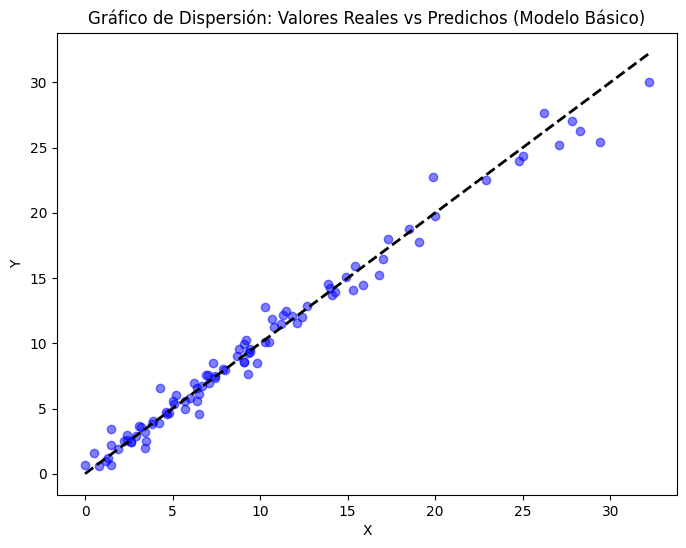

Relacion entre cada variable independiente vs variable dependiente(PTS)


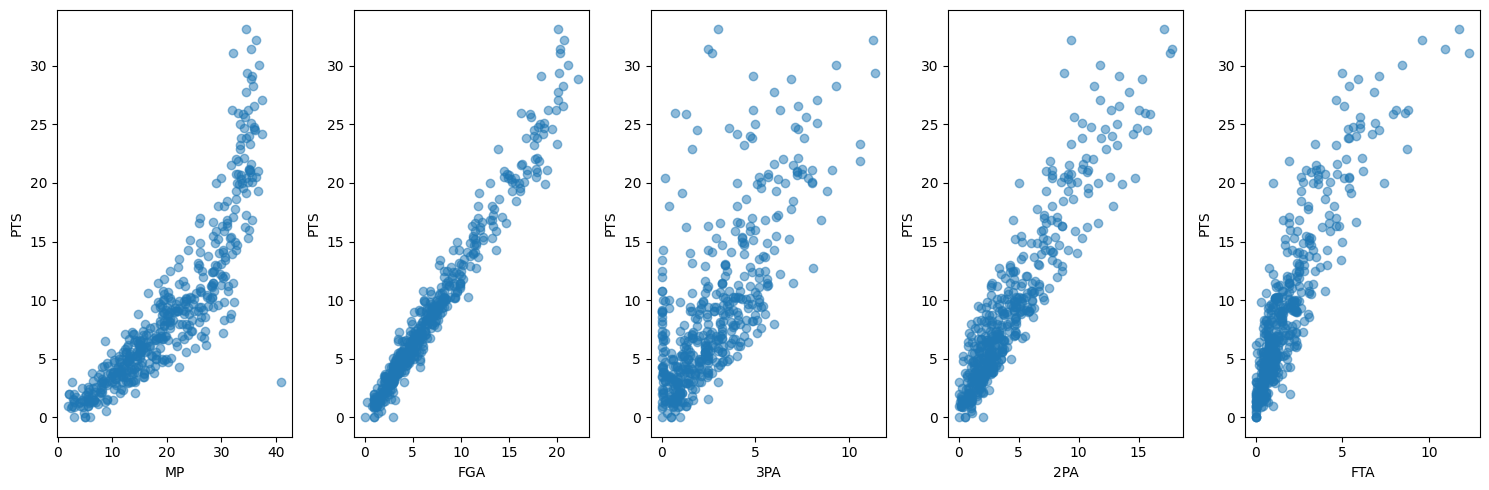

MSE: 0.987412810442392
RMSE : 0.9936864749217391
MAE : 0.6990971833492441
R^2 : 0.9820045647619914


Coeficientes del Modelo Básico:
MP: 0.04919968819709042
FGA: 0.5091093206743298
3PA: 0.4701944028880803
2PA: 0.47805895282177463
FTA: 0.8762080512789446


In [138]:
# Definir variables independientes y dependientes
X_basic = df[['MP', 'FGA', '3PA', '2PA', 'FTA']]
y = df['PTS']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_basic, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
modelo_basico = LinearRegression()
modelo_basico.fit(X_train, y_train)

# Calcular predicciones del modelo básico
y_pred_basico = modelo_basico.predict(X_test)

# Graficar dispersión de valores reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_basico, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de Dispersión: Valores Reales vs Predichos (Modelo Básico)')
plt.show()


# Graficar cada variable independiente vs la variable dependiente (PTS) para el modelo básico
print("Relacion entre cada variable independiente vs variable dependiente(PTS)")

fig, axs = plt.subplots(nrows=1, ncols=len(X_basic.columns), figsize=(15, 5))

for i, column in enumerate(X_basic.columns):
    axs[i].scatter(df[column], df['PTS'], alpha=0.5)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('PTS')

plt.tight_layout()
plt.show()


# Evaluar el modelo
y_pred_basico = modelo_basico.predict(X_test)
mse_basico = mean_squared_error(y_test, y_pred_basico)
rmse_basico = np.sqrt(mse_basico)
mae_basico = mean_absolute_error(y_test, y_pred_basico)
r2_basico = r2_score(y_test, y_pred_basico)

print(f"MSE: {mse_basico}")
print(f"RMSE : {rmse_basico}")
print(f"MAE : {mae_basico}")
print(f"R^2 : {r2_basico}")
print(f"")

# Obtener los coeficientes
print()
coeficientes_basico = modelo_basico.coef_
print("Coeficientes del Modelo Básico:")
for feature, coef in zip(X_basic.columns, coeficientes_basico):
    print(f"{feature}: {coef}")
 

### b) Modelo Avanzado: Estadísticas Ofensivas y Defensivas

Este modelo incorpora estadísticas tanto ofensivas como defensivas para capturar un mayor rango de habilidades que pueden influir en los puntos anotados.

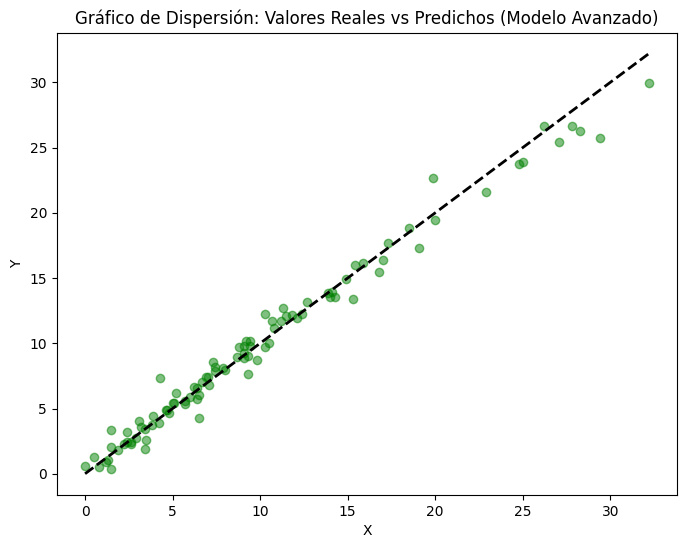

Relacion entre cada variable independiente vs variable dependiente(PTS)


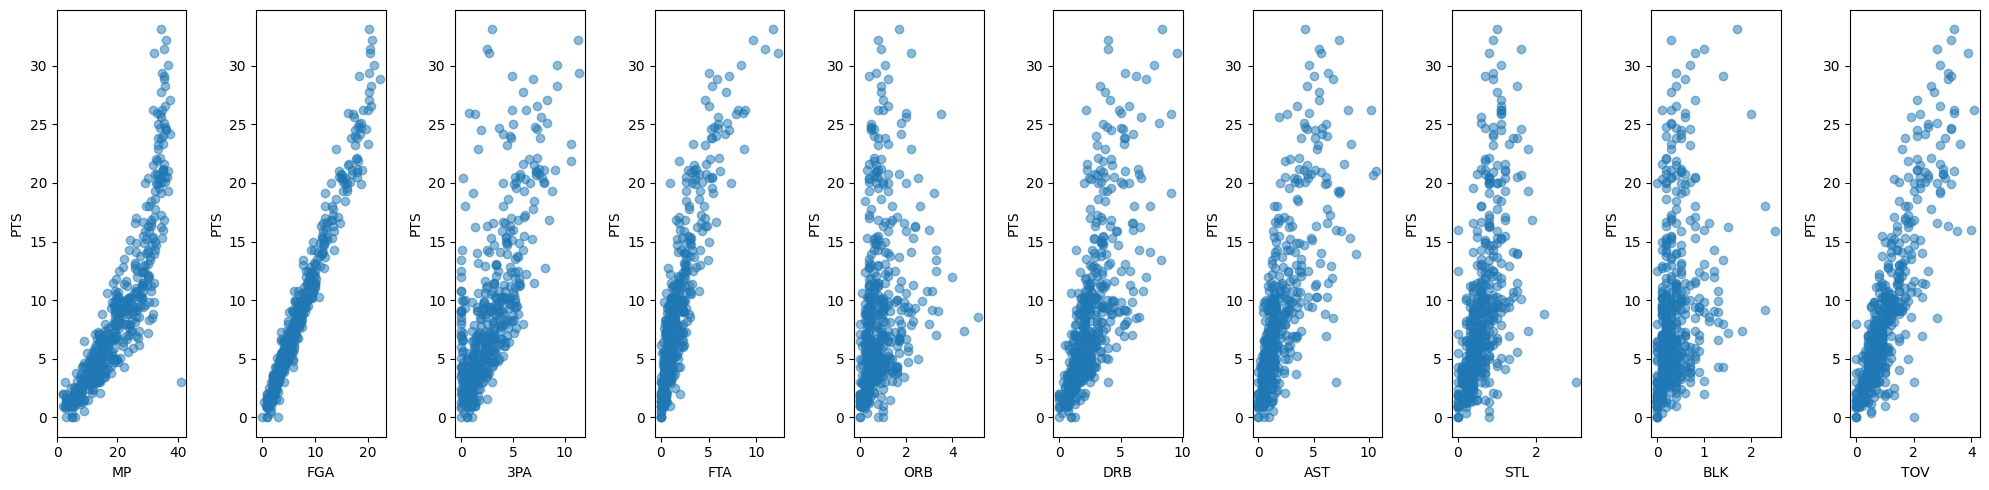

MSE: 1.0258680535676141
RMSE : 1.0128514469395866
MAE : 0.7257336745286782
R^2 : 0.9813037243131909


Coeficientes del Modelo Avanzado:
MP: 0.0436886708470501
FGA: 0.9941849752231597
3PA: 0.07445727553976067
FTA: 0.8417716192586966
ORB: 0.03746040988754437
DRB: 0.02901822344790506
AST: -0.08666723701925699
STL: -0.2501447273841976
BLK: 0.6483148226666804
TOV: -0.0021640625157572945


In [139]:
# Definir variables independientes y dependientes
X_avanzado = df[['MP', 'FGA', '3PA', 'FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV']]
y = df['PTS']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_avanzado, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
modelo_avanzado = LinearRegression()
modelo_avanzado.fit(X_train, y_train)

# Calcular predicciones del modelo avanzado
y_pred_avanzado = modelo_avanzado.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_avanzado, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de Dispersión: Valores Reales vs Predichos (Modelo Avanzado)')
plt.show()

# Graficar cada variable independiente vs la variable dependiente (PTS) para el modelo avanzado

print("Relacion entre cada variable independiente vs variable dependiente(PTS)")
fig, axs = plt.subplots(nrows=1, ncols=len(X_avanzado.columns), figsize=(20, 5))

for i, column in enumerate(X_avanzado.columns):
    axs[i].scatter(df[column], df['PTS'], alpha=0.5)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('PTS')

plt.tight_layout()
plt.show()


# Evaluar el modelo
y_pred_avanzado = modelo_avanzado.predict(X_test)
mse_avanzado = mean_squared_error(y_test, y_pred_avanzado)
rmse_avanzado = np.sqrt(mse_avanzado)
mae_avanzado = mean_absolute_error(y_test, y_pred_avanzado)
r2_avanzado = r2_score(y_test, y_pred_avanzado)

print(f"MSE: {mse_avanzado}")
print(f"RMSE : {rmse_avanzado}")
print(f"MAE : {mae_avanzado}")
print(f"R^2 : {r2_avanzado}")
print(f"")

# Obtener los coeficientes
print()
coeficientes_avanzado = modelo_avanzado.coef_
print("Coeficientes del Modelo Avanzado:")
for feature, coef in zip(X_avanzado.columns, coeficientes_avanzado):
    print(f"{feature}: {coef}")

### c) Modelo Completo: Estadísticas basicas y avanzadas


Este modelo utiliza indicadores avanzados de rendimiento, como el porcentaje de uso, eficiencia, y valores de rendimiento ofensivo y defensivo.

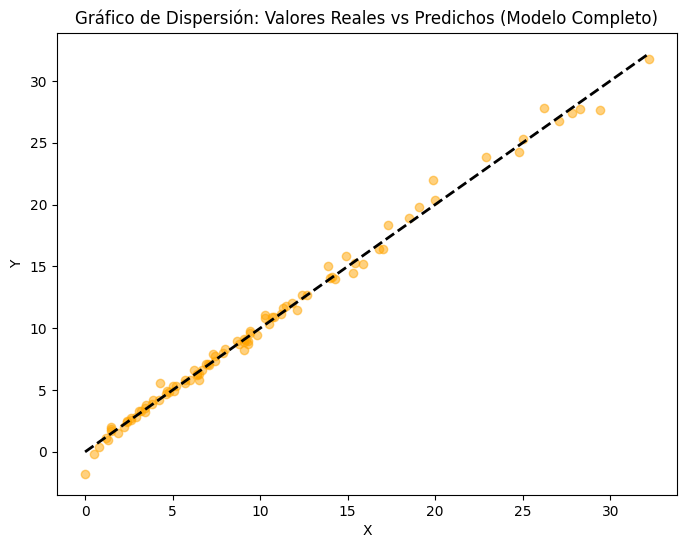

Relacion entre cada variable independiente vs variable dependiente(PTS)


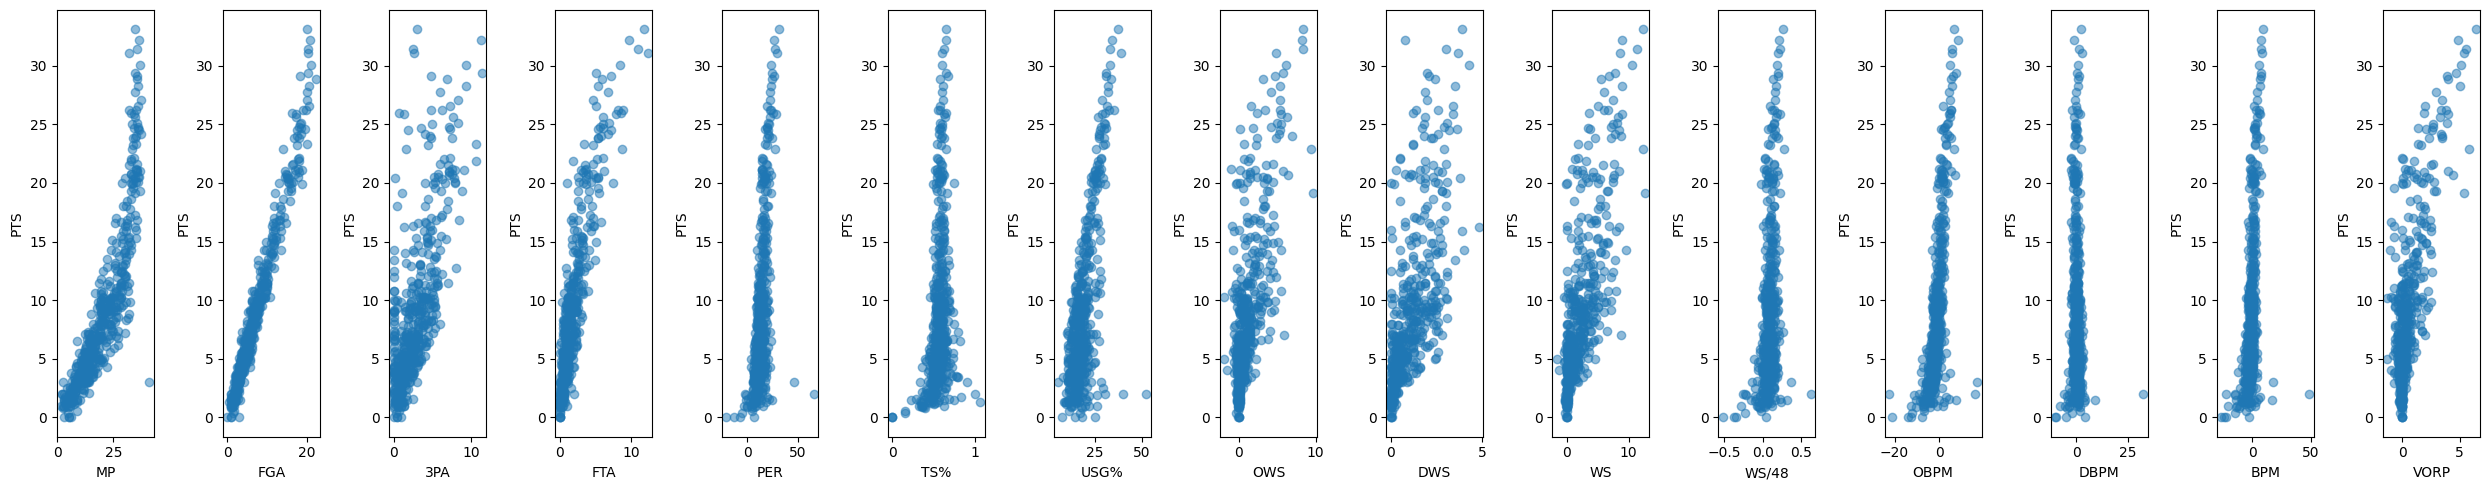

MSE: 0.3154486867054282
RMSE : 0.5616481876632633
MAE : 0.38860646090391043
R^2 : 0.9942509998326039


Coeficientes del Modelo Completo:
MP: 0.011785573125863228
FGA: 1.0749119267550422
3PA: 0.022411805723847208
FTA: 0.5725158401856867
PER: 0.0101796983713261
TS%: 4.565304072746834
USG%: 0.003084775809646091
OWS: -0.33659790146989405
DWS: -0.8360035361678303
WS: 0.5894504786905209
WS/48: 2.2774251914282493
OBPM: -0.27233483623159016
DBPM: -0.2555343624403868
BPM: 0.2239888029289696
VORP: 0.2268267089160919


In [140]:
# Definir variables independientes y dependientes
X_completo = df[['MP', 'FGA', '3PA', 'FTA', 'PER', 'TS%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']].copy()
y = df['PTS']

# Imputar valores faltantes con la media de cada columna
X_completo.fillna(X_completo.mean(), inplace=True)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_completo, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
modelo_completo = LinearRegression()
modelo_completo.fit(X_train, y_train)

# Calcular predicciones del modelo completo
y_pred_completo = modelo_completo.predict(X_test)

# Graficar dispersión de valores reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_completo, color='orange', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de Dispersión: Valores Reales vs Predichos (Modelo Completo)')
plt.show()


# Graficar cada variable independiente vs la variable dependiente (PTS) para el modelo completo
print("Relacion entre cada variable independiente vs variable dependiente(PTS)")

fig, axs = plt.subplots(nrows=1, ncols=len(X_completo.columns), figsize=(25, 5))

for i, column in enumerate(X_completo.columns):
    axs[i].scatter(df[column], df['PTS'], alpha=0.5)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('PTS')

plt.tight_layout()
plt.show()


# Evaluar el modelo
y_pred_completo = modelo_completo.predict(X_test)
mse_completo = mean_squared_error(y_test, y_pred_completo)
rmse_completo = np.sqrt(mse_completo)
mae_completo = mean_absolute_error(y_test, y_pred_completo)
r2_completo = r2_score(y_test, y_pred_completo)

print(f"MSE: {mse_completo}")
print(f"RMSE : {rmse_completo}")
print(f"MAE : {mae_completo}")
print(f"R^2 : {r2_completo}")
print(f"")

print()
# Obtener los coeficientes
coeficientes_completo = modelo_completo.coef_
print("Coeficientes del Modelo Completo:")
for feature, coef in zip(X_completo.columns, coeficientes_completo):
    print(f"{feature}: {coef}")



## 5. Conclusiones

In [141]:
import pandas as pd

# Datos de los modelos
data = {
    'Modelo': ['Básico', 'Avanzado', 'Completo'],
    'MSE': [0.987412810442392, 1.0258680535676141, 0.3154486867054282],
    'RMSE': [0.9936864749217391, 1.0128514469395866, 0.5616481876632633],
    'MAE': [0.6990971833492441, 0.7257336745286782, 0.38860646090391043],
    'R^2': [0.9820045647619914, 0.9813037243131909, 0.9942509998326039]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Mostrar la tabla
df


,Modelo,MSE,RMSE,MAE,R^2
0,Básico,0.987413,0.993686,0.699097,0.982005
1,Avanzado,1.025868,1.012851,0.725734,0.981304
2,Completo,0.315449,0.561648,0.388606,0.994251


# 5. Conclusiones


#### Metricas de rendimiento

| Métrica | Modelo Básico | Modelo Avanzado | Modelo Completo |
|---------|----------------|-----------------|-----------------|
| MSE     | 0.9874         | 1.0259          | 0.3154          |
| RMSE    | 0.9937         | 1.0129          | 0.5616          |
| MAE     | 0.6991         | 0.7257          | 0.3886          |
| R²      | 0.9820         | 0.9813          | 0.9943          |

#### Coeficientes

| Variable | Modelo Básico | Modelo Avanzado | Modelo Completo |
|----------|----------------|-----------------|-----------------|
| MP       | 0.0492         | 0.0437          | 0.0118          |
| FGA      | 0.5091         | 0.9942          | 1.0749          |
| 3PA      | 0.4702         | 0.0745          | 0.0224          |
| 2PA      | 0.4781         | -               | -               |
| FTA      | 0.8762         | 0.8418          | 0.5725          |
| ORB      | -              | 0.0375          | -               |
| DRB      | -              | 0.0290          | -               |
| AST      | -              | -0.0867         | -               |
| STL      | -              | -0.2501         | -               |
| BLK      | -              | 0.6483          | -               |
| TOV      | -              | -0.0022         | -               |
| PER      | -              | -               | 0.0102          |
| TS%      | -              | -               | 4.5653          |
| USG%     | -              | -               | 0.0031          |
| OWS      | -              | -               | -0.3366         |
| DWS      | -              | -               | -0.8360         |
| WS       | -              | -               | 0.5895          |
| WS/48    | -              | -               | 2.2774          |
| OBPM     | -              | -               | -0.2723         |
| DBPM     | -              | -               | -0.2555         |
| BPM      | -              | -               | 0.2240          |
| VORP     | -              | -               | 0.2268          |



### Comparación de Modelos

#### Métricas de Rendimiento

- **MSE, RMSE, y MAE**:
  - **Modelo Completo** tiene los valores más bajos para MSE (0.3154), RMSE (0.5616), y MAE (0.3886), indicando que es el modelo con los errores de predicción más bajos.
  - **Modelo Básico** tiene valores de MSE (0.9874), RMSE (0.9937), y MAE (0.6991) que son superiores a los del modelo completo pero inferiores a los del modelo avanzado.
  - **Modelo Avanzado** tiene los valores más altos para MSE (1.0259), RMSE (1.0129), y MAE (0.7257), lo que sugiere que es el menos preciso de los tres.

- **R²**:
  - **Modelo Completo** tiene el valor más alto de R² (0.9943), indicando un ajuste excelente y superior a los otros dos modelos.
  - **Modelo Básico** tiene un R² de 0.9820, lo cual también indica un ajuste excelente pero menor al modelo completo
  - **Modelo Avanzado** tiene el valor más bajo de R² (0.9813) aunque sigue siendo excelente, es ligeramente inferior al modelo básico.

#### Coeficientes y Variables Independientes

- **Modelo Básico** usa cinco variables (MP, FGA, 3PA, 2PA, FTA) y se puede observar que FGA y FTA son los predictores más fuertes con coeficientes positivos altos.
  
- **Modelo Avanzado** usa diez variables (MP, FGA, 3PA, FTA, ORB, DRB, AST, STL, BLK, TOV). Los coeficientes de FGA, BLK, y FTA son los más influyentes, pero también hay coeficientes negativos (AST, STL, TOV) que sugieren una influencia negativa en la predicción de puntos.
  
- **Modelo Completo** usa catorce variables, incluyendo estadísticas avanzadas (PER, TS%, USG%, OWS, DWS, WS, WS/48, OBPM, DBPM, BPM, VORP). TS%, WS/48, y FGA tienen los coeficientes más altos, indicando su fuerte influencia en la predicción de puntos.

### Conclusión

El **Modelo Completo** es superior en términos de rendimiento con los valores más bajos de MSE, RMSE, y MAE, y el valor más alto de R². Esto indica que este modelo tiene la mejor capacidad predictiva y explica la mayor parte de la variabilidad en los puntos de los jugadores. Sin embargo todos los modelos presentan un buen ajuste, lo cual va mejorando a medida que agregamos variables independientes. A pesar de esto se conluye que no se compensa la añadidura de variables, respecto a la mejora del ajuste, pues entre el modelo basico y el completo existe una diferencia de 9 variables, y una pequeña distancia de 0.0123 en la metrica R2-Score.



Para un modelo ideal, basado en los coeficientes y su influencia en los puntos, podriamos considerar solo 4 variables independientes, es decir, aquellas que presentaron mayor influencia en la cantidad de puntos convertido por cada jugador de la NBA. Compensando asi la cantidad de variables y el rendimiento del modelo de regresion lineal. Estas serian:
- **FGA (Intentos de campo)**
- **FTA (Intentos de tiros libres)**
- **TS% (True Shooting Percentage)**
- **WS/48 (Win Shares per 48 minutes)**

Estas variables tienen un impacto significativo en la predicción de puntos y deberían ser incluidas en un modelo futuro para maximizar la precisión y rendimiento del modelo.

Por lo tanto, se concluye que el **Modelo Completo** es el mejor modelo para predecir los puntos de jugadores de la NBA, dado su excelente ajuste y precisión. Sin embargo igualmente el modelo avanzado y basico presentan un buen ajuste, y tambien se puede confiar en ellos.
